In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: xgboost in c:\users\aarti\anaconda3\lib\site-packages (2.1.3)



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Update the base path to the correct location using raw string literals (r"")
base_path = r"C:\Users\aarti\OneDrive\Desktop\50560739_50599568_50606698_50560545_phase_2\50560739_50599568_50606698_50560545_phase_2\Dataset"

# Update the file paths with raw string literals
expenditure_on_inmates = pd.read_csv(f"{base_path}\\Expenditure_on_inmates.CSV")
value_of_goods = pd.read_csv(f"{base_path}\\Value_of_goods_produced_by_inmates.csv")
convicted_df = pd.read_csv(f"{base_path}\\IPC_crime_inmates_convicted.csv")
undertrial_df = pd.read_csv(f"{base_path}\\IPC_crime_inmates_under_trial.csv")

df_rehabilitation = pd.read_csv(f"{base_path}\\Rehabilitation.csv")
df_recividivism = pd.read_csv(f"{base_path}\\Recidivism.csv")

df_training_of_officers = pd.read_csv(f"{base_path}\\Training_of_Jail_Officers.CSV")
df_inmates_escapee = pd.read_csv(f"{base_path}\\Inmates_escapee.csv")
df_strength_of_officials = pd.read_csv(f"{base_path}\\Strength_of_officials.CSV")
df_inmates_death = pd.read_csv(f"{base_path}\\Inmates_death.csv")


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Update the base path to the correct location using forward slashes
base_path = r"C:/Users/aarti/OneDrive/Desktop/50560739_50599568_50606698_50560545_phase_2/50560739_50599568_50606698_50560545_phase_2/Dataset"

# Update the file paths with forward slashes
expenditure_on_inmates = pd.read_csv(f"{base_path}/Expenditure_on_inmates.CSV")
value_of_goods = pd.read_csv(f"{base_path}/Value_of_goods_produced_by_inmates.csv")
convicted_df = pd.read_csv(f"{base_path}/IPC_crime_inmates_convicted.csv")
undertrial_df = pd.read_csv(f"{base_path}/IPC_crime_inmates_under_trial.csv")

df_rehabilitation = pd.read_csv(f"{base_path}/Rehabilitation.csv")
df_recividivism = pd.read_csv(f"{base_path}/Recidivism.csv")

df_training_of_officers = pd.read_csv(f"{base_path}/Training_of_Jail_Officers.CSV")
df_inmates_escapee = pd.read_csv(f"{base_path}/Inmates_escapee.csv")
df_strength_of_officials = pd.read_csv(f"{base_path}/Strength_of_officials.CSV")
df_inmates_death = pd.read_csv(f"{base_path}/Inmates_death.csv")


In [4]:
expenditure_on_inmates = expenditure_on_inmates.drop_duplicates()
convicted_df = convicted_df.drop_duplicates()
undertrial_df = undertrial_df.drop_duplicates()
df_rehabilitation = df_rehabilitation.drop_duplicates()
df_strength_of_officials = df_strength_of_officials.drop_duplicates()

# Now you can proceed with further analysis or cleaning of these datasets
print(expenditure_on_inmates.head())  # Example to see the first few rows
print(convicted_df.head())

   TimePeriod          Area_Name    Indicator_Name  Data_Value
0        2001    Jammu & Kashmir  Food Expenditure    15763500
1        2001   Himachal Pradesh  Food Expenditure     5910000
2        2001             Punjab  Food Expenditure    54787000
3        2001         Chandigarh  Food Expenditure     3400000
4        2001        Uttarakhand  Food Expenditure     9881280
         STATE/UT  YEAR                    CRIME HEAD  Male 16-18 years  \
0  Andhra Pradesh  2001                        Murder               1.0   
1  Andhra Pradesh  2001      Attempt To Commit Murder               0.0   
2  Andhra Pradesh  2001  C.H. Not Amounting To Murder               0.0   
3  Andhra Pradesh  2001                          Rape               0.0   
4  Andhra Pradesh  2001      Kidnapping And Abduction               0.0   

   Female 16-18 years  Total 16-18 years  Male 18-30 years  \
0                   0                  1               688   
1                   0                  0       

In [5]:
# Convert 'TimePeriod' in expenditure_on_inmates to datetime format (Year only)
expenditure_on_inmates['TimePeriod'] = pd.to_datetime(expenditure_on_inmates['TimePeriod'], format='%Y')

# Modify 'YEAR' in value_of_goods to datetime format (Year only)
value_of_goods['YEAR'] = pd.to_datetime(value_of_goods['YEAR'].astype(str).str.strip(), format='%Y')

# Rename columns in value_of_goods and expenditure_on_inmates
value_of_goods.rename(columns={'Gross Value of Sale Proceeds / Earning (In Rs.)': 'value_of_goods'}, inplace=True)
expenditure_on_inmates.rename(columns={'Data_Value': 'expenditure'}, inplace=True)

# Calculate total criminals rehabilitated by summing specified columns in df_rehabilitation
different_categories_of_rehabilitation = ['financial_assistance_provided', 'rehabilitated', 'legal_aid_provided']
df_rehabilitation['Total_criminals_rehabilitated'] = df_rehabilitation[different_categories_of_rehabilitation].sum(axis=1)


In [6]:
# Load the dataset
inmates_escapees = pd.read_csv(f"{base_path}\\Inmates_escapee.csv")

# Identify integer columns
int_columns = inmates_escapees.select_dtypes(include='int').columns

# For integer columns that might have been incorrectly represented as strings
for col in int_columns:
    inmates_escapees[col] = inmates_escapees[col].astype(str).str.lstrip('0').replace('', '0').astype(int)

# Display the updated DataFrame
print(inmates_escapees)


          state_name  year                        detail  male  female  total
0     Andhra Pradesh  2001   Escapees from Inside Prison  13.0     0.0   13.0
1     Andhra Pradesh  2001  Escapees from Outside Prison   3.0     0.0    3.0
2     Andhra Pradesh  2001  Escapees from Police Custody  20.0     NaN   20.0
3     Andhra Pradesh  2001          Re-arrested escapees  20.0     NaN   20.0
4     Andhra Pradesh  2002   Escapees from Inside Prison   6.0     NaN    6.0
...              ...   ...                           ...   ...     ...    ...
1783     Lakshadweep  2013          Re-arrested escapees   0.0     0.0    0.0
1784     Pondicherry  2013   Escapees from Inside Prison   0.0     0.0    0.0
1785     Pondicherry  2013  Escapees from Outside Prison   0.0     0.0    0.0
1786     Pondicherry  2013  Escapees from Police Custody   0.0     0.0    0.0
1787     Pondicherry  2013          Re-arrested escapees   0.0     0.0    0.0

[1788 rows x 6 columns]


In [7]:
# Load the dataset using the base path
inmates_escapees = pd.read_csv(f"{base_path}\\Inmates_escapee.csv")

# Fill missing values with 0
inmates_escapees = inmates_escapees.fillna(0)

# Display the first 5 rows
inmates_escapees.head(5)


,state_name,year,detail,male,female,total
0,Andhra Pradesh,2001,Escapees from Inside Prison,13.0,0.0,13.0
1,Andhra Pradesh,2001,Escapees from Outside Prison,3.0,0.0,3.0
2,Andhra Pradesh,2001,Escapees from Police Custody,20.0,0.0,20.0
3,Andhra Pradesh,2001,Re-arrested escapees,20.0,0.0,20.0
4,Andhra Pradesh,2002,Escapees from Inside Prison,6.0,0.0,6.0


In [8]:
# Load the dataset using the base path
age_group = pd.read_csv(f"{base_path}\\Age_group.csv")

# Dropping 'is_state' column
age_group = age_group.drop('is_state', axis=1)



In [9]:
# Load the datasets using the base path
crime_inmates_convicted_z = pd.read_csv(f"{base_path}\\IPC_crime_inmates_convicted.csv")
crime_inmates_under_trial_z = pd.read_csv(f"{base_path}\\IPC_crime_inmates_under_trial.csv")

# Adding suffixes to differentiate between convicted and undertrial datasets
convicted_renamed_df = crime_inmates_convicted_z.add_suffix('_convicted')
under_trial_renamed_df = crime_inmates_under_trial_z.add_suffix('_undertrial')

# Renaming columns to standardize them
convicted_renamed_df.rename(columns={'STATE/UT_convicted': 'STATE/UT', 'YEAR_convicted': 'YEAR', 'CRIME HEAD_convicted': 'CRIME HEAD'}, inplace=True)
under_trial_renamed_df.rename(columns={'STATE/UT_undertrial': 'STATE/UT', 'YEAR_undertrial': 'YEAR', 'CRIME HEAD_undertrial': 'CRIME HEAD'}, inplace=True)

# Merging the datasets based on common columns
combined_df = pd.merge(convicted_renamed_df, under_trial_renamed_df, on=['STATE/UT', 'YEAR', 'CRIME HEAD'], how='inner')

# Display the combined dataframe
print(combined_df.head())


         STATE/UT  YEAR                    CRIME HEAD  \
0  Andhra Pradesh  2001                        Murder   
1  Andhra Pradesh  2001      Attempt To Commit Murder   
2  Andhra Pradesh  2001  C.H. Not Amounting To Murder   
3  Andhra Pradesh  2001                          Rape   
4  Andhra Pradesh  2001      Kidnapping And Abduction   

   Male 16-18 years_convicted  Female 16-18 years_convicted  \
0                         1.0                             0   
1                         0.0                             0   
2                         0.0                             0   
3                         0.0                             0   
4                         0.0                             0   

   Total 16-18 years_convicted  Male 18-30 years_convicted  \
0                            1                         688   
1                            0                          38   
2                            0                          78   
3                            0

In [10]:
# Load the Population and Capacity of Jails dataset
Population_and_capacity_of_jails = pd.read_csv(f"{base_path}\\Population_and_capacity_of_jails.csv")

# Replace 'Odisha' with 'ORISSA' and filter the relevant values
Population_and_capacity_of_jails = Population_and_capacity_of_jails.replace('Odisha', 'ORISSA')
filtered_values = Population_and_capacity_of_jails[Population_and_capacity_of_jails['STATE/UT'].isin(['Odisha', 'ORISSA'])]

# Creating a new column by summing 'Grand Total_convicted' and 'Grand Total_undertrial'
combined_df['Grand Total_combined'] = combined_df['Grand Total_convicted'] + combined_df['Grand Total_undertrial']

# Display the selected columns for the combined dataset
print(combined_df[['Grand Total_convicted', 'Grand Total_undertrial', 'Grand Total_combined']].head())


   Grand Total_convicted  Grand Total_undertrial  Grand Total_combined
0                   2219                    1167                  3386
1                    121                     469                   590
2                    226                     226                   452
3                    166                     332                   498
4                     17                     144                   161


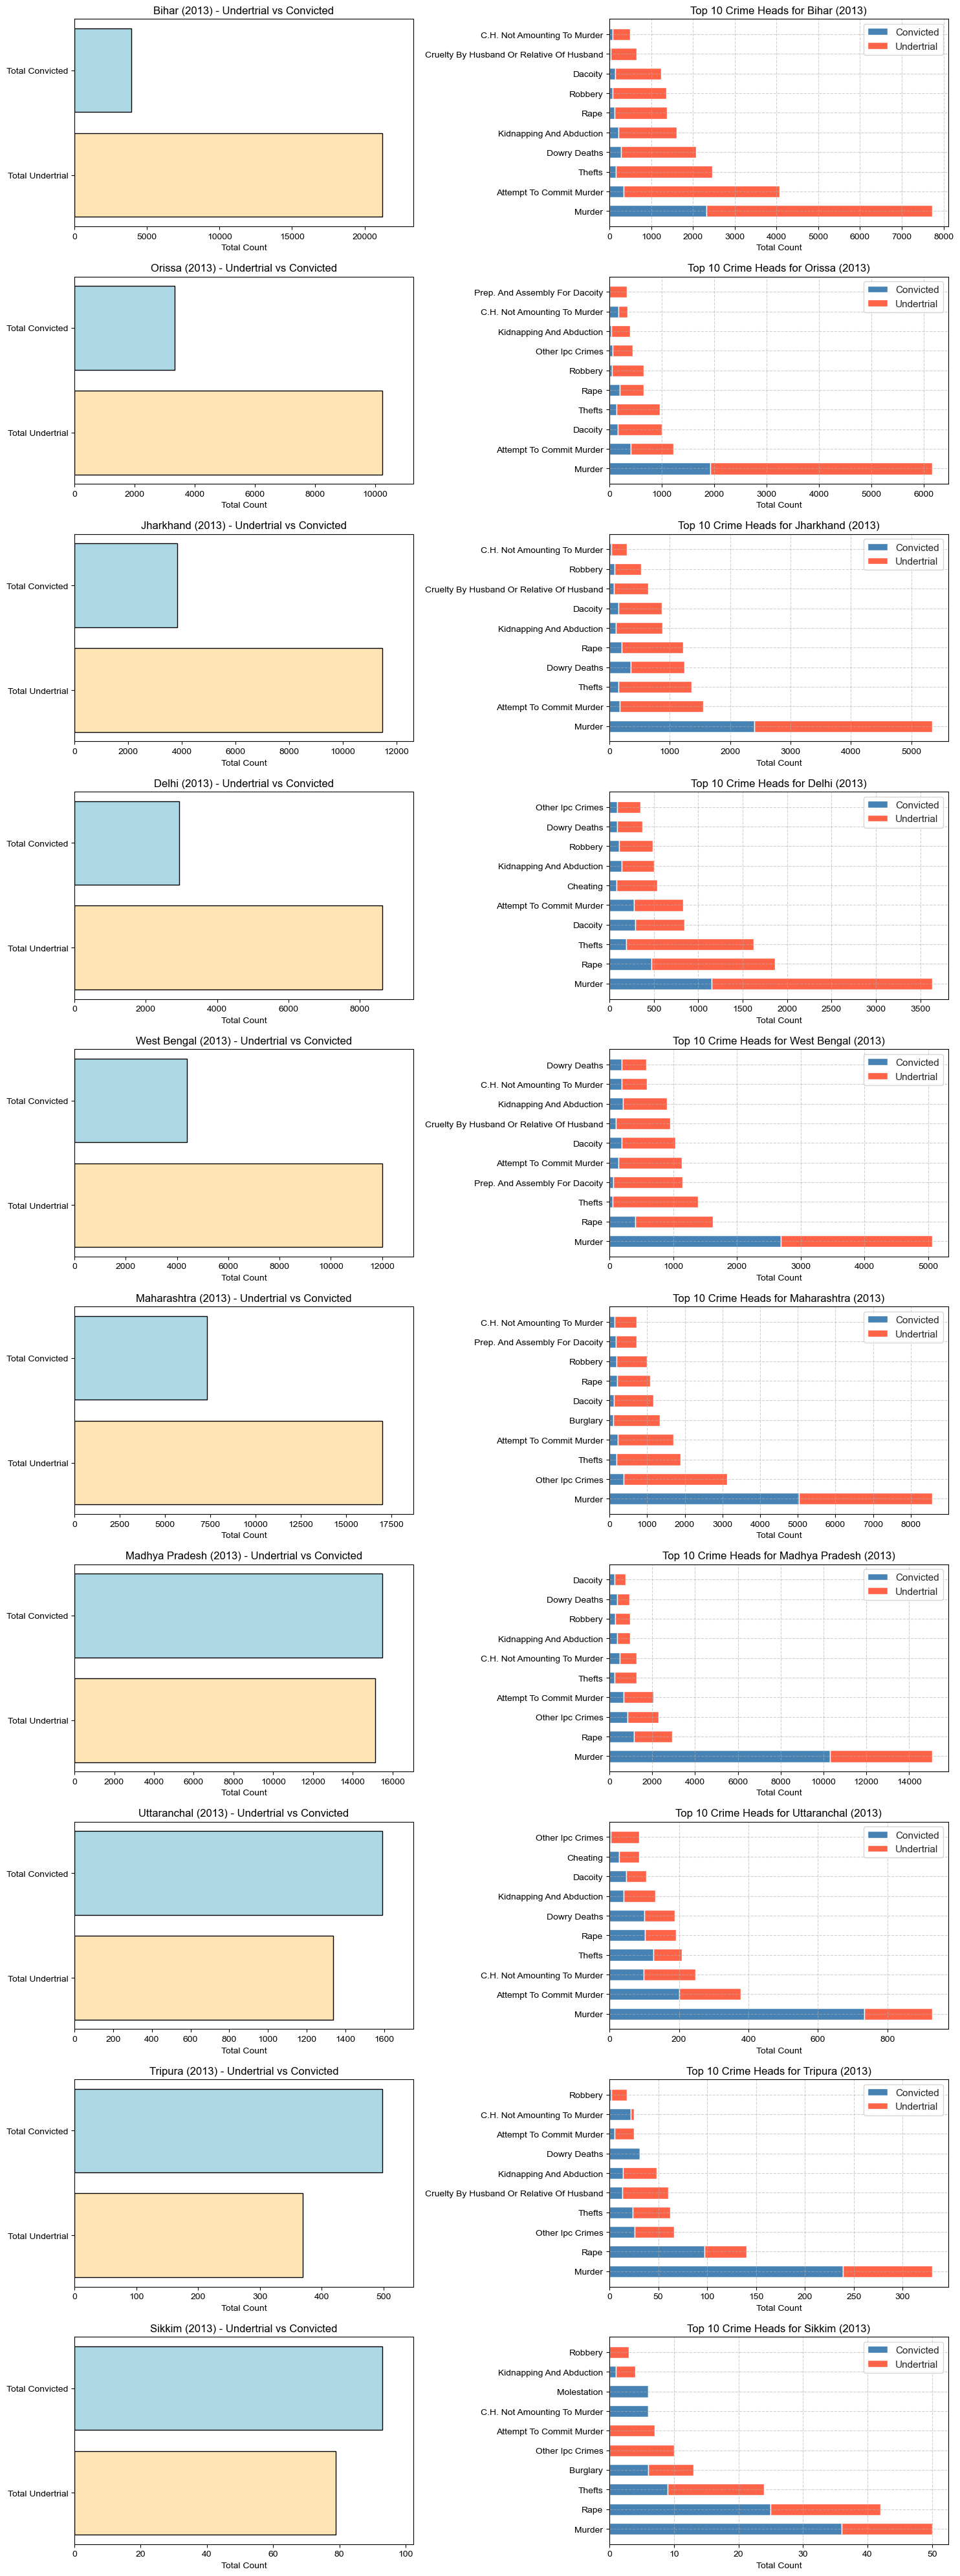

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Define the states of interest
states_of_interest = ["Bihar", "Orissa", "Jharkhand", "Delhi", "West Bengal", "Maharashtra", "Madhya Pradesh", 
                      "Uttaranchal", "Tripura", "Sikkim"]

# Create subplots with larger figure size
fig, axes = plt.subplots(10, 2, figsize=(15, 40))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Set a new theme for the visualizations
sns.set_theme(style="whitegrid", palette="muted")

# Iterate over the states to generate the visualizations
for idx, state in enumerate(states_of_interest):
    # Filter the data for the current state and year 2013
    filtered_df_state = combined_df[(combined_df['STATE/UT'] == state) & (combined_df['YEAR'] == 2013)]

    total_undertrial = filtered_df_state['Grand Total_undertrial'].sum()
    total_convicted = filtered_df_state['Grand Total_convicted'].sum()

    data = [total_undertrial, total_convicted]
    labels = ['Total Undertrial', 'Total Convicted']

    # Alternative visualization: Horizontal Bar Plot for Undertrial vs Convicted
    axes[idx * 2].barh(labels, data, color=['#FFE5B4', '#ADD8E6'], edgecolor='black')
    axes[idx * 2].set_title(f'{state} (2013) - Undertrial vs Convicted', fontsize=12)
    axes[idx * 2].set_xlabel('Total Count', fontsize=10)
    axes[idx * 2].set_xlim(0, max(data) * 1.1)  # Add some padding to the x-axis

    # Top 10 Crime Heads based on the 'Grand Total_combined'
    top_10_state_df = filtered_df_state.nlargest(10, 'Grand Total_combined')

    crime_heads = top_10_state_df['CRIME HEAD']
    convicted_values = top_10_state_df['Grand Total_convicted']
    undertrial_values = top_10_state_df['Grand Total_undertrial']

    # Stacked Bar Plot for Crime Heads comparison (convicted vs undertrial)
    axes[idx * 2 + 1].barh(crime_heads, convicted_values, label='Convicted', color='steelblue', height=0.6)
    axes[idx * 2 + 1].barh(crime_heads, undertrial_values, left=convicted_values, label='Undertrial', color='tomato', height=0.6)

    axes[idx * 2 + 1].set_title(f'Top 10 Crime Heads for {state} (2013)', fontsize=12)
    axes[idx * 2 + 1].set_xlabel('Total Count', fontsize=10)
    axes[idx * 2 + 1].legend(loc='upper right')

    # Add a grid for better readability
    axes[idx * 2 + 1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()  # Adjust layout to fit all subplots

plt.show()


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load and preprocess the dataset using the correct absolute path
dataset_path = r'C:\Users\aarti\OneDrive\Desktop\50560739_50599568_50606698_50560545_phase_2\50560739_50599568_50606698_50560545_phase_2\Dataset\output.xlsx'
combined_df = pd.read_excel(dataset_path)
combined_df['Target'] = combined_df['Grand Total_undertrial'] > combined_df['Grand Total_convicted']
combined_df['Target'] = combined_df['Target'].astype(int)

# Define features and target variable
features = ['STATE/UT', 'CRIME HEAD', 'Total Male_undertrial', 'Total Female_undertrial', 'Grand Total_combined']
X = pd.get_dummies(combined_df[features], drop_first=True)  # One-hot encode categorical features
y = combined_df['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])
report = classification_report(y_test, y_pred)

# Display results
print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
print("Classification Report:\n", report)


Accuracy: 0.9994629430719656
ROC AUC Score: 0.999994826192401
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       625
           1       1.00      1.00      1.00      1237

    accuracy                           1.00      1862
   macro avg       1.00      1.00      1.00      1862
weighted avg       1.00      1.00      1.00      1862



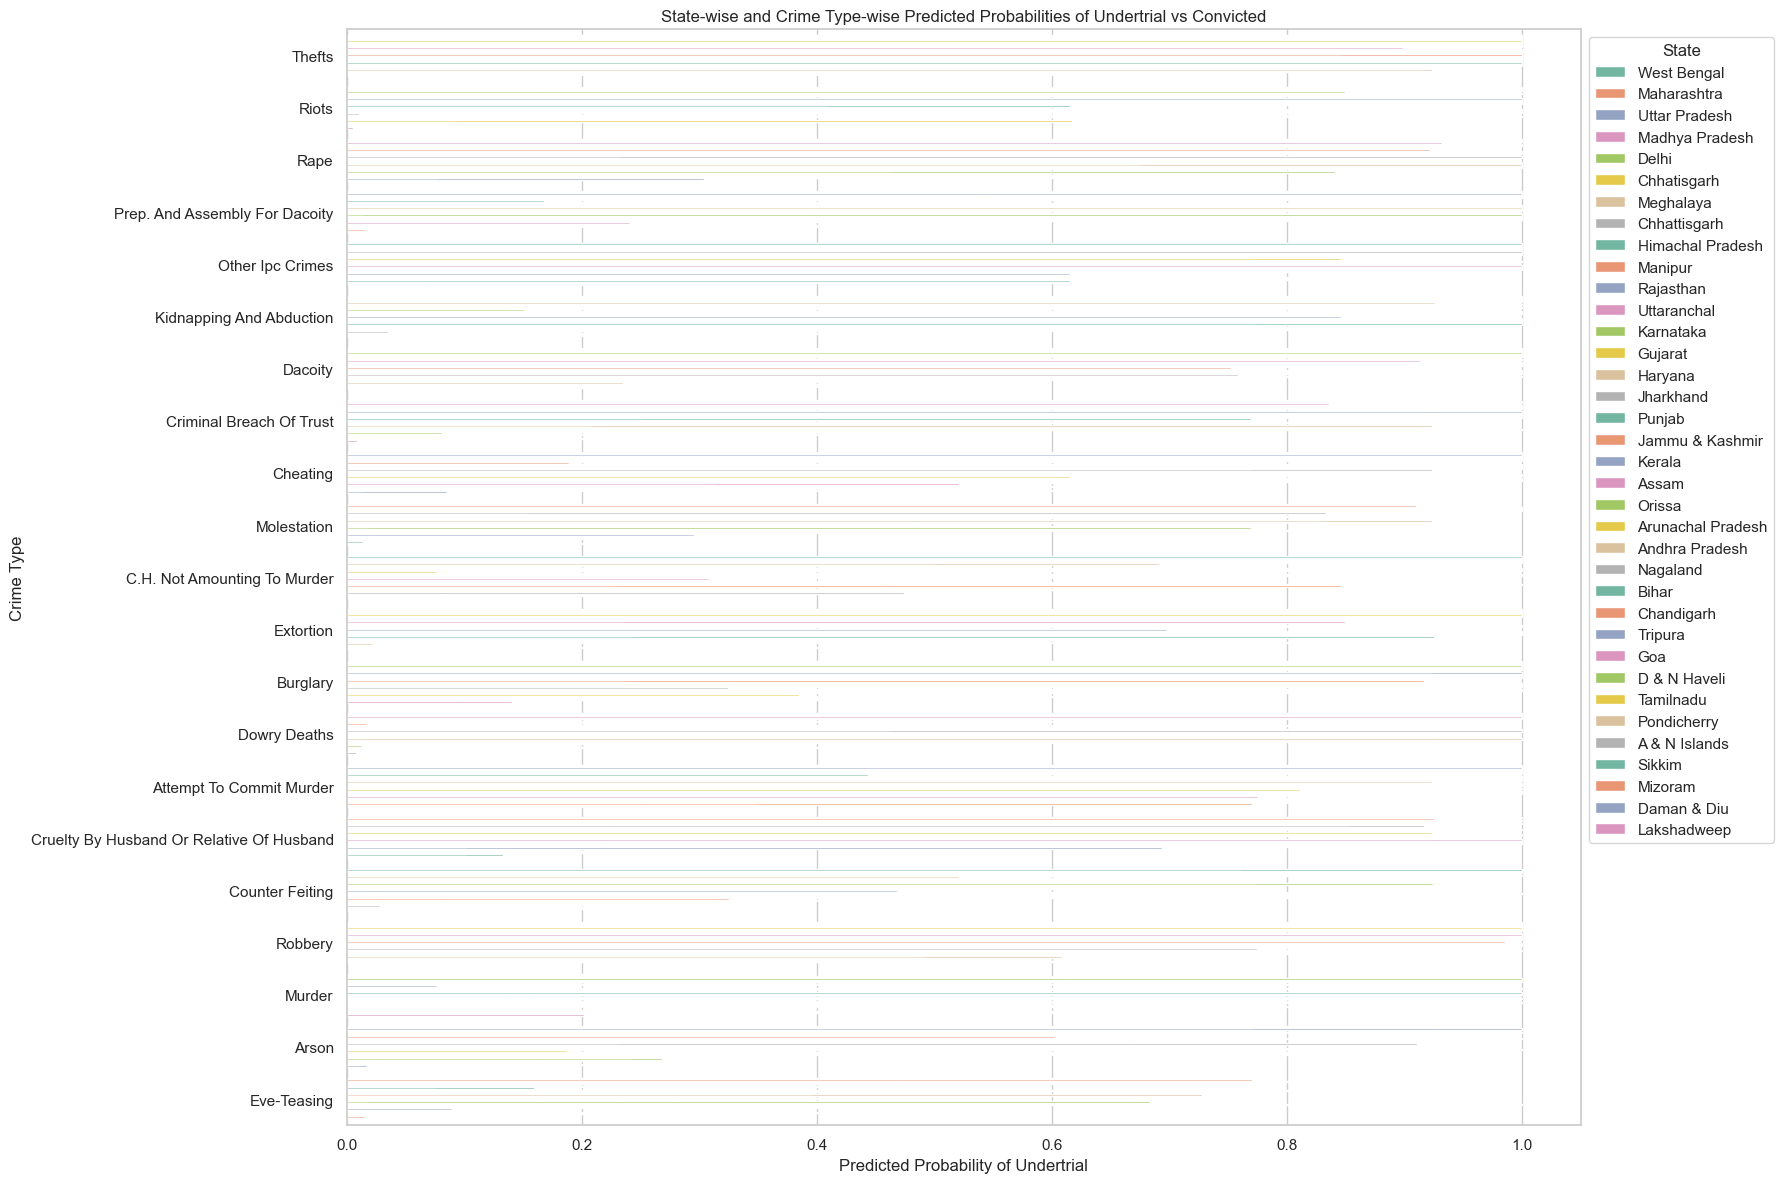

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Load dataset (use your own dataset path)
dataset_path = r'C:\Users\aarti\OneDrive\Desktop\50560739_50599568_50606698_50560545_phase_2\50560739_50599568_50606698_50560545_phase_2\Dataset\output.xlsx'
combined_df = pd.read_excel(dataset_path)

# Assuming you have the model already trained (if not, train it here)
lr_model = LogisticRegression(random_state=42)
X = pd.get_dummies(combined_df[['STATE/UT', 'CRIME HEAD', 'Total Male_undertrial', 'Total Female_undertrial', 'Grand Total_combined']], drop_first=True)
y = (combined_df['Grand Total_undertrial'] > combined_df['Grand Total_convicted']).astype(int)
lr_model.fit(X, y)

# Add prediction probabilities to the DataFrame for analysis
combined_df['Predicted Probability'] = lr_model.predict_proba(X)[:, 1]

# Create a summary by State and Crime Type, calculating average predicted probability
state_crime_prob = combined_df.groupby(['STATE/UT', 'CRIME HEAD'])['Predicted Probability'].mean().reset_index()

# Sort values by predicted probability for better visibility
state_crime_prob_sorted = state_crime_prob.sort_values(by='Predicted Probability', ascending=False)

# Plot bar chart (differentiated by states and crime types)
plt.figure(figsize=(18, 12))
sns.barplot(data=state_crime_prob_sorted, x='Predicted Probability', y='CRIME HEAD', hue='STATE/UT', dodge=True, palette='Set2')

plt.title("State-wise and Crime Type-wise Predicted Probabilities of Undertrial vs Convicted")
plt.xlabel("Predicted Probability of Undertrial")
plt.ylabel("Crime Type")
plt.legend(title="State", loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


C:\Users\aarti\AppData\Local\Temp\ipykernel_33312\1125674846.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=coef_df['Coefficient'], y=coef_df['Feature'], palette="viridis")


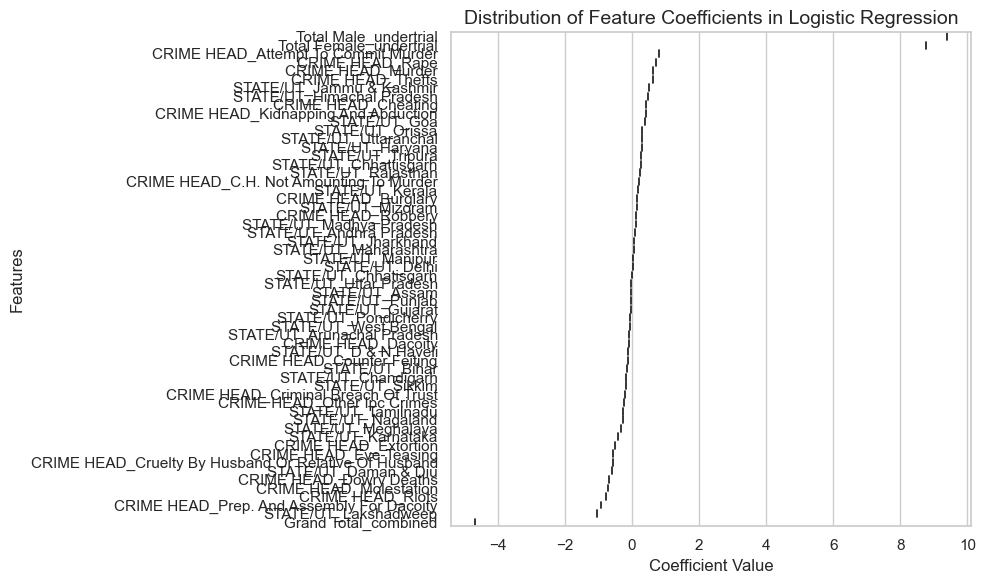

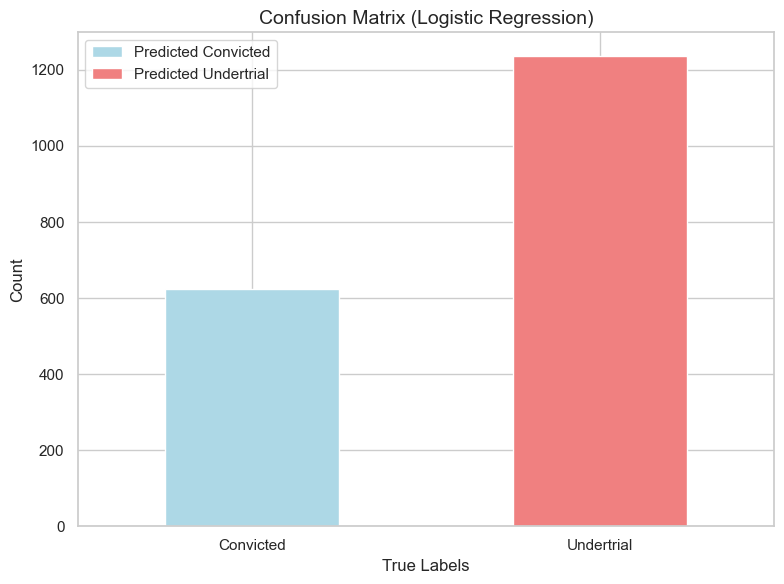

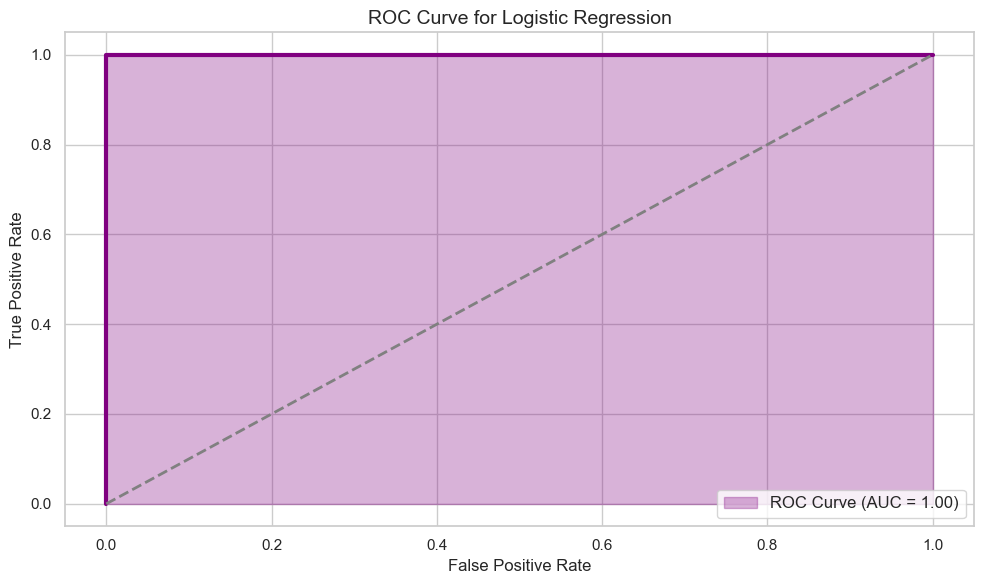

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Load dataset
df = pd.read_excel(r"C:\Users\aarti\OneDrive\Desktop\50560739_50599568_50606698_50560545_phase_2\50560739_50599568_50606698_50560545_phase_2\Dataset\output.xlsx")

# Process the data
df['Target'] = df['Grand Total_undertrial'] > df['Grand Total_convicted']
df['Target'] = df['Target'].astype(int)

# Define the features and target variable
features = ['STATE/UT', 'CRIME HEAD', 'Total Male_undertrial', 'Total Female_undertrial', 'Grand Total_combined']
X = pd.get_dummies(df[features], drop_first=True)
y = df['Target']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# 1. Feature Importance (Using coefficients from Logistic Regression)
coef = lr_model.coef_[0]
feature_names = X.columns
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coef
}).sort_values(by='Coefficient', ascending=False)

# Violin Plot to show distribution of feature coefficients
plt.figure(figsize=(10, 6))
sns.violinplot(x=coef_df['Coefficient'], y=coef_df['Feature'], palette="viridis")
plt.title('Distribution of Feature Coefficients in Logistic Regression', fontsize=14)
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()

# 2. Confusion Matrix (Bar Plot)
y_pred = lr_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Convert confusion matrix to DataFrame for easier manipulation
cm_df = pd.DataFrame(cm, index=['Convicted', 'Undertrial'], columns=['Predicted Convicted', 'Predicted Undertrial'])

# Plot confusion matrix as a bar chart
cm_df.plot(kind='bar', stacked=True, color=['lightblue', 'lightcoral'], figsize=(8, 6))
plt.title('Confusion Matrix (Logistic Regression)', fontsize=14)
plt.xlabel('True Labels', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 3. ROC Curve (Stacked Area Plot)
y_prob = lr_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.fill_between(fpr, tpr, color='purple', alpha=0.3, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot(fpr, tpr, color='purple', lw=3)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve for Logistic Regression', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.tight_layout()
plt.show()


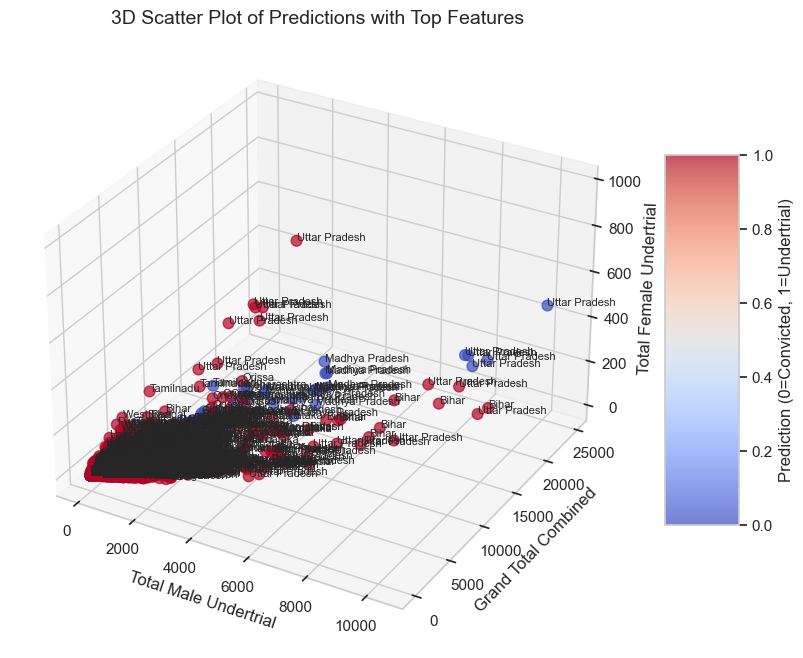

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Assuming the dataset is already loaded and processed:
df = pd.read_excel(r"C:\Users\aarti\OneDrive\Desktop\50560739_50599568_50606698_50560545_phase_2\50560739_50599568_50606698_50560545_phase_2\Dataset\output.xlsx")
df['Target'] = df['Grand Total_undertrial'] > df['Grand Total_convicted']
df['Target'] = df['Target'].astype(int)

# Define features and target variable
features = ['STATE/UT', 'CRIME HEAD', 'Total Male_undertrial', 'Total Female_undertrial', 'Grand Total_combined']
X = pd.get_dummies(df[features], drop_first=True)
y = df['Target']

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Select three top features for 3D visualization
X_plot = X[['Total Male_undertrial', 'Grand Total_combined', 'Total Female_undertrial']]

# Get the predictions
predictions = rf_model.predict(X)

# Create a new figure for 3D scatter plot using matplotlib
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color-coded predictions (using 'coolwarm' colormap for better differentiation)
scatter = ax.scatter(X_plot['Total Male_undertrial'], X_plot['Grand Total_combined'], X_plot['Total Female_undertrial'],
                     c=predictions, cmap='coolwarm', s=60, alpha=0.7)

# Set labels for the axes
ax.set_xlabel('Total Male Undertrial', fontsize=12)
ax.set_ylabel('Grand Total Combined', fontsize=12)
ax.set_zlabel('Total Female Undertrial', fontsize=12)
ax.set_title('3D Scatter Plot of Predictions with Top Features', fontsize=14)

# Create a colorbar based on predictions to distinguish the classes
cbar = plt.colorbar(scatter, ax=ax, shrink=0.6, aspect=5)
cbar.set_label('Prediction (0=Convicted, 1=Undertrial)', fontsize=12)

# Adding hover functionality for states (not directly interactive in static plots, but can be useful in interactive notebooks)
# Instead of hovering, we can show text labels on the plot (optional)
for i in range(len(X_plot)):
    ax.text(X_plot.iloc[i, 0], X_plot.iloc[i, 1], X_plot.iloc[i, 2], df['STATE/UT'].iloc[i], fontsize=8)

plt.show()


In [16]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import pandas as pd

# Load and preprocess the dataset using the correct absolute path
dataset_path = r'C:\Users\aarti\OneDrive\Desktop\50560739_50599568_50606698_50560545_phase_2\50560739_50599568_50606698_50560545_phase_2\Dataset\output.xlsx'
combined_df = pd.read_excel(dataset_path)
combined_df['Target'] = combined_df['Grand Total_undertrial'] > combined_df['Grand Total_convicted']
combined_df['Target'] = combined_df['Target'].astype(int)

# Define features and target variable
features = ['STATE/UT', 'CRIME HEAD', 'Total Male_undertrial', 'Total Female_undertrial', 'Grand Total_combined']
X = pd.get_dummies(combined_df[features], drop_first=True)  # One-hot encode categorical features
y = combined_df['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', probability=True, random_state=42)  # Linear kernel with probability enabled
svm_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, svm_model.predict_proba(X_test)[:, 1])
report = classification_report(y_test, y_pred)

# Display results
print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
print("Classification Report:\n", report)


Accuracy: 1.0
ROC AUC Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       625
           1       1.00      1.00      1.00      1237

    accuracy                           1.00      1862
   macro avg       1.00      1.00      1.00      1862
weighted avg       1.00      1.00      1.00      1862



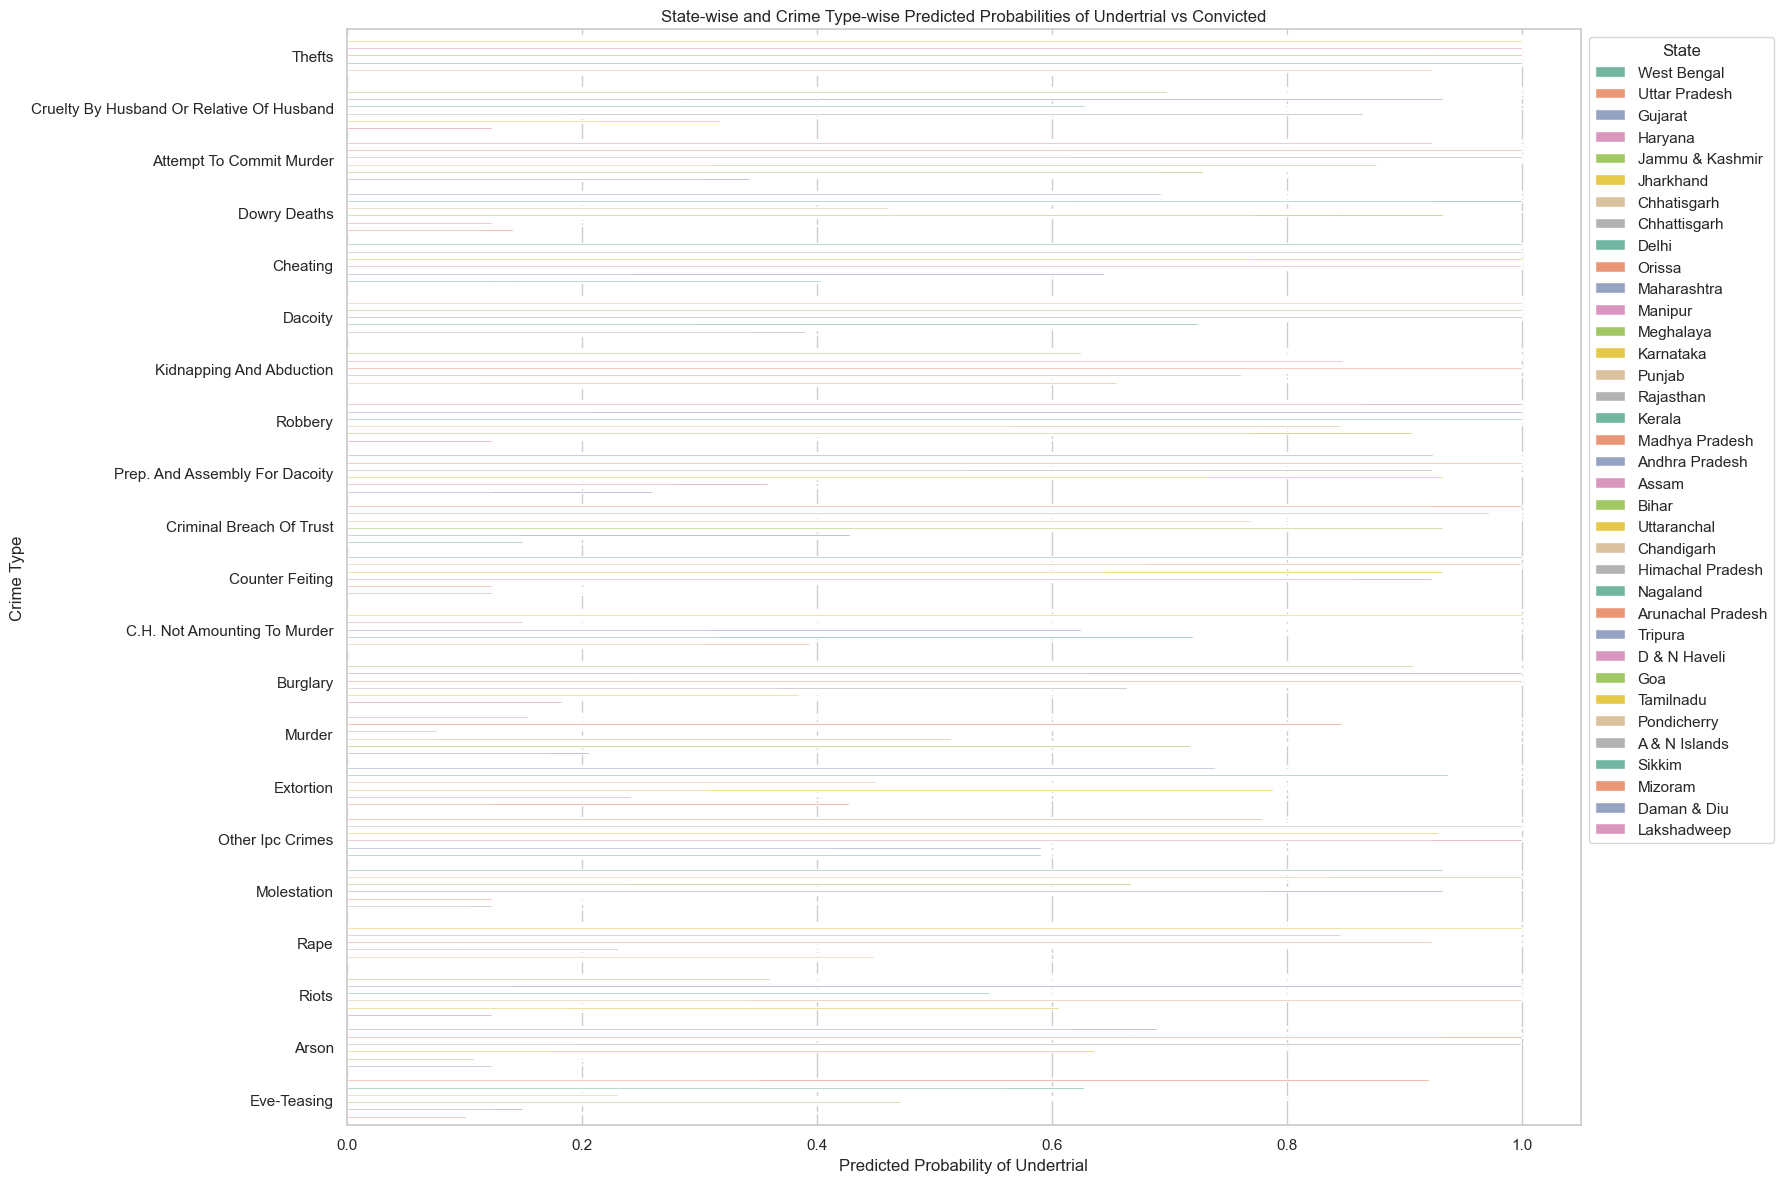

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Load dataset (use your own dataset path)
dataset_path = r'C:\Users\aarti\OneDrive\Desktop\50560739_50599568_50606698_50560545_phase_2\50560739_50599568_50606698_50560545_phase_2\Dataset\output.xlsx'
combined_df = pd.read_excel(dataset_path)

# Define features and target
X = pd.get_dummies(combined_df[['STATE/UT', 'CRIME HEAD', 'Total Male_undertrial', 'Total Female_undertrial', 'Grand Total_combined']], drop_first=True)
y = (combined_df['Grand Total_undertrial'] > combined_df['Grand Total_convicted']).astype(int)

# Split data (if needed, adjust accordingly)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Add predicted probabilities (or decision scores for linear SVM)
combined_df['Predicted Probability'] = svm_model.predict_proba(X)[:, 1]  # For SVM with probability=True

# Create a summary by State and Crime Type, calculating average predicted probability
state_crime_prob = combined_df.groupby(['STATE/UT', 'CRIME HEAD'])['Predicted Probability'].mean().reset_index()

# Sort values by predicted probability for better visibility
state_crime_prob_sorted = state_crime_prob.sort_values(by='Predicted Probability', ascending=False)

# Plot bar chart (differentiated by states and crime types)
plt.figure(figsize=(18, 12))
sns.barplot(data=state_crime_prob_sorted, x='Predicted Probability', y='CRIME HEAD', hue='STATE/UT', dodge=True, palette='Set2')

plt.title("State-wise and Crime Type-wise Predicted Probabilities of Undertrial vs Convicted")
plt.xlabel("Predicted Probability of Undertrial")
plt.ylabel("Crime Type")
plt.legend(title="State", loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


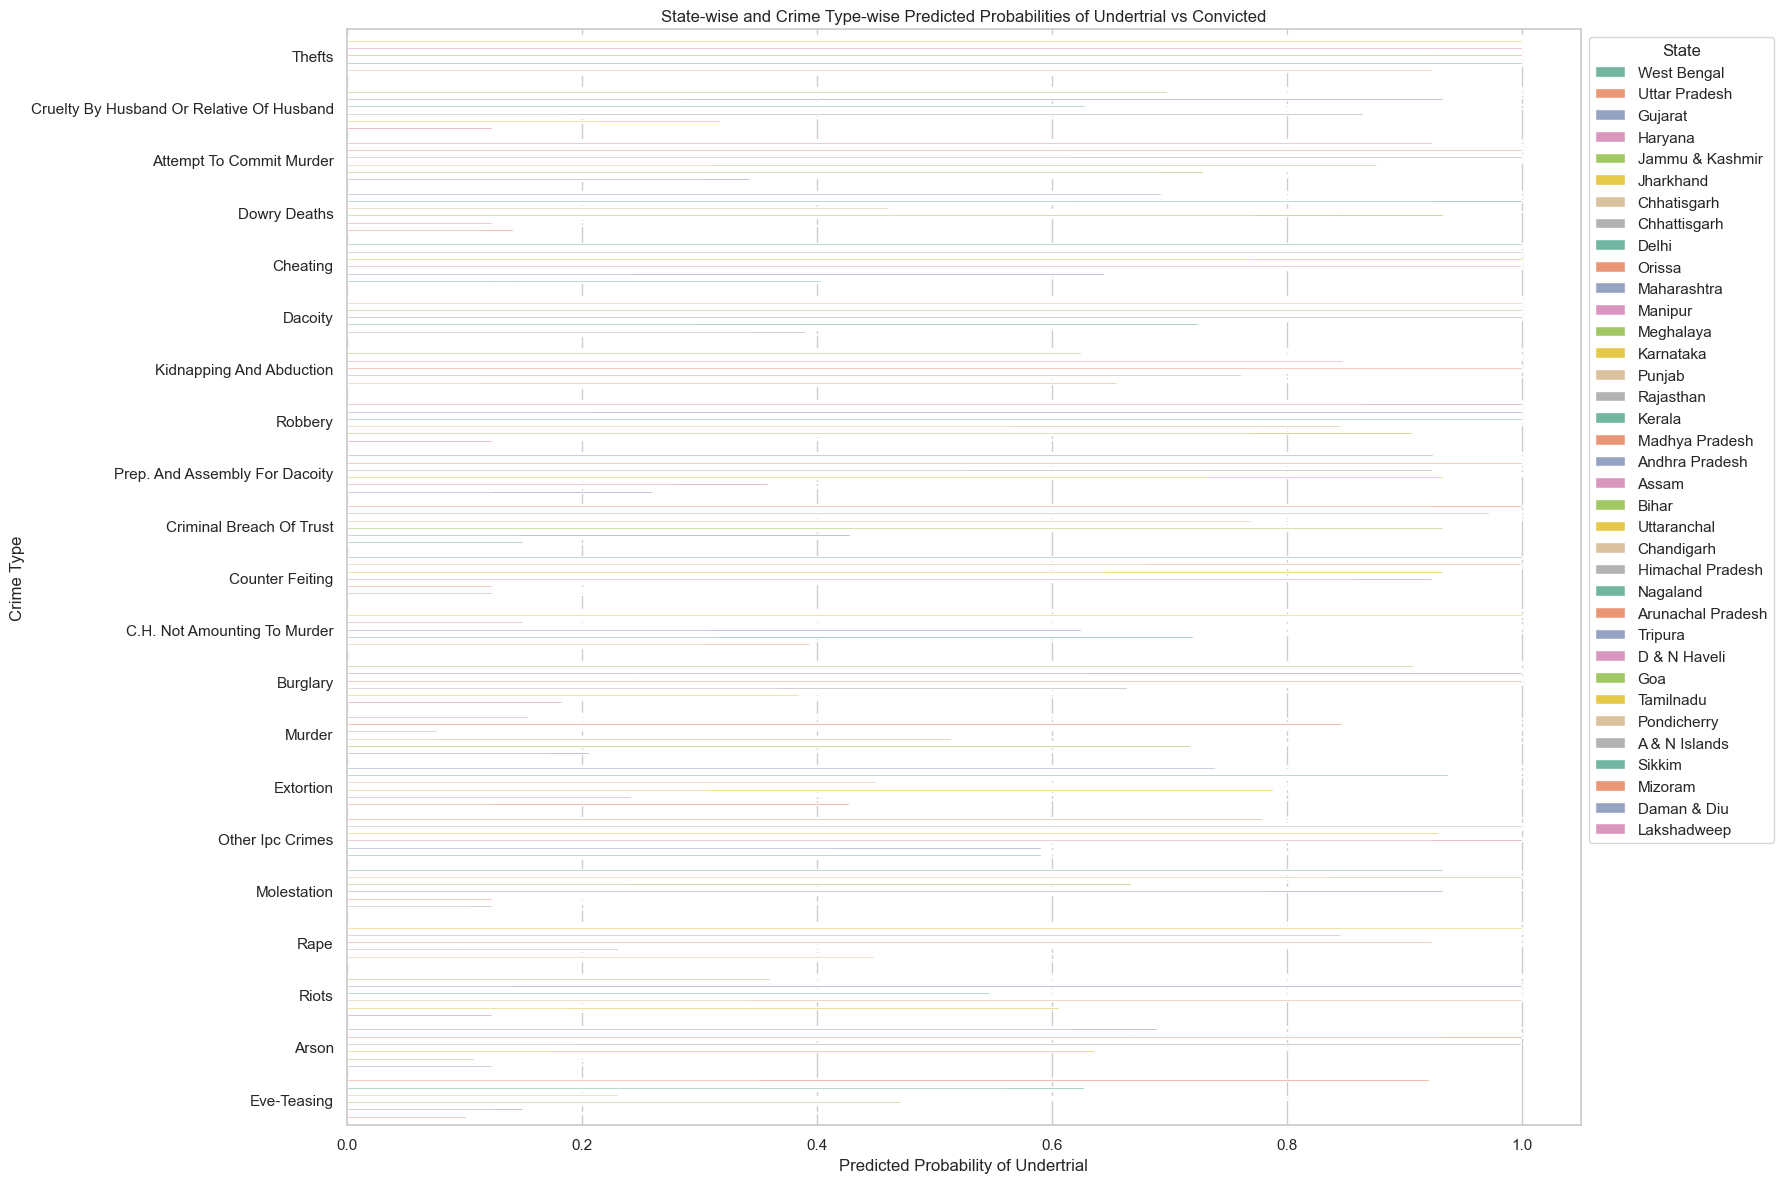

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Load dataset using the correct path
dataset_path = r'C:\Users\aarti\OneDrive\Desktop\50560739_50599568_50606698_50560545_phase_2\50560739_50599568_50606698_50560545_phase_2\Dataset\output.xlsx'
combined_df = pd.read_excel(dataset_path)

# Define features and target
X = pd.get_dummies(combined_df[['STATE/UT', 'CRIME HEAD', 'Total Male_undertrial', 'Total Female_undertrial', 'Grand Total_combined']], drop_first=True)
y = (combined_df['Grand Total_undertrial'] > combined_df['Grand Total_convicted']).astype(int)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Add predicted probabilities for analysis
combined_df['Predicted Probability'] = svm_model.predict_proba(X)[:, 1]

# Group data by State and Crime Type and calculate mean predicted probabilities
state_crime_prob = combined_df.groupby(['STATE/UT', 'CRIME HEAD'])['Predicted Probability'].mean().reset_index()

# Sort the grouped data by predicted probabilities for visualization
state_crime_prob_sorted = state_crime_prob.sort_values(by='Predicted Probability', ascending=False)

# Visualize the data
plt.figure(figsize=(18, 12))
sns.barplot(data=state_crime_prob_sorted, x='Predicted Probability', y='CRIME HEAD', hue='STATE/UT', dodge=True, palette='Set2')

plt.title("State-wise and Crime Type-wise Predicted Probabilities of Undertrial vs Convicted")
plt.xlabel("Predicted Probability of Undertrial")
plt.ylabel("Crime Type")
plt.legend(title="State", loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Check for non-numeric columns
categorical_columns = X.select_dtypes(include=['object', 'category']).columns
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns

# One-Hot Encode Categorical Columns
column_transformer = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ]
)

# Transform the dataset
X_transformed = column_transformer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Scale the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 595   30]
 [   3 1234]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       625
           1       0.98      1.00      0.99      1237

    accuracy                           0.98      1862
   macro avg       0.99      0.97      0.98      1862
weighted avg       0.98      0.98      0.98      1862



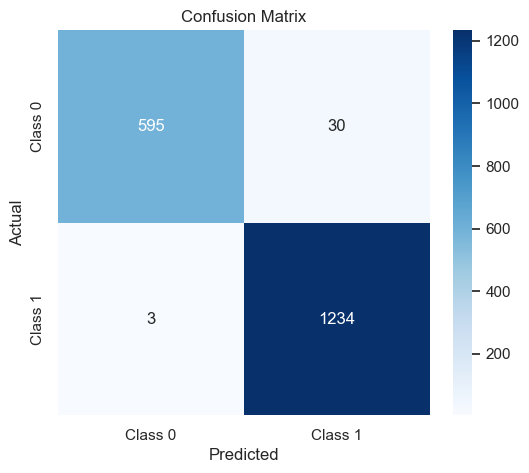

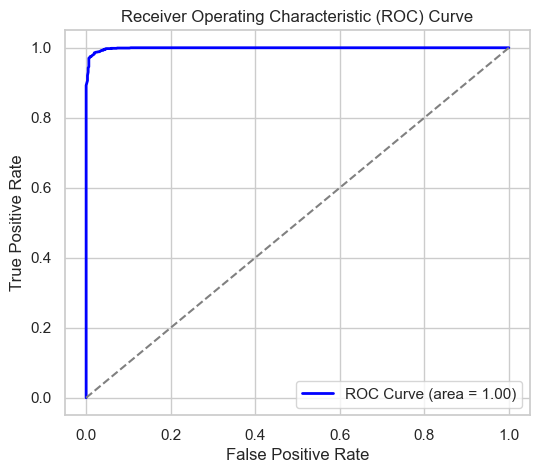

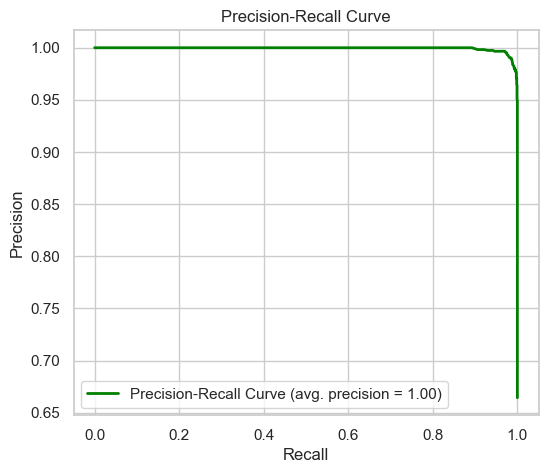

In [22]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])  # get the probabilities for the positive class (Class 1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
average_precision = average_precision_score(y_test, model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(6, 5))
plt.plot(recall, precision, color='green', lw=2, label=f'Precision-Recall Curve (avg. precision = {average_precision:.2f})')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()


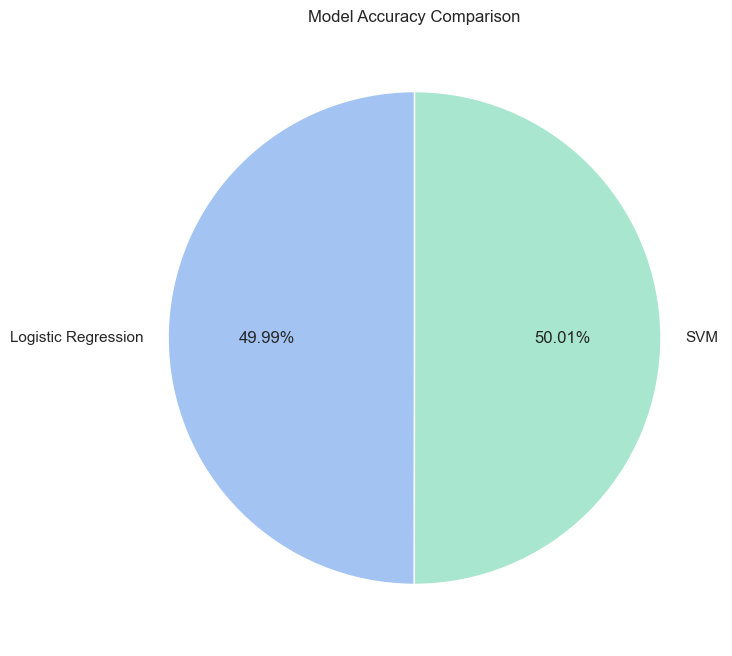

In [38]:
import matplotlib.pyplot as plt

# Accuracy values for Logistic Regression and SVM
accuracy_lr = 0.9994629430719656
accuracy_svm = 1.0

# Convert accuracy to percentage for the pie chart
accuracies = [accuracy_lr * 100, accuracy_svm * 100]  # Convert to percentages
labels = ['Logistic Regression', 'SVM']

# Light colors for the pie chart
colors = ['#A3C4F3', '#A8E6CF']  # Light blue and light green

# Plot pie chart for accuracy comparison
plt.figure(figsize=(8, 8))
plt.pie(accuracies, labels=labels, autopct='%1.2f%%', startangle=90, colors=colors)
plt.title('Model Accuracy Comparison')
plt.show()
